<a href="https://colab.research.google.com/github/Sawarijamgaonkar/Next_Gen_Dev/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Next_Gen_Dev/credit_card_fraud_detection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


([<matplotlib.patches.Wedge at 0x7a317475f8b0>,
 [Text(0.838934233642034, -0.711469852926639, 'Legitimate'),
  Text(-0.8389342763157392, 0.7114698026076631, 'Fraudulent')],
 [Text(0.457600491077473, -0.3880744652327121, '99.8%'),
  Text(-0.4576005143540395, 0.38807443778599804, '0.2%')])

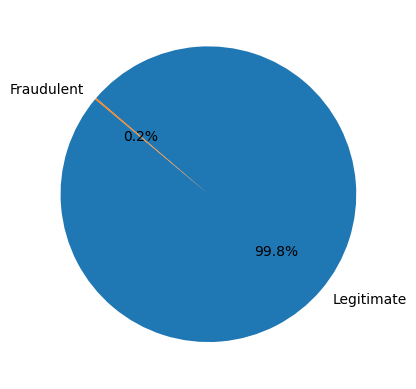

In [7]:
plt.pie(df['Class'].value_counts(), labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140)

In [8]:
# import seaborn as sns

# # Plot the distribution of the 'Amount' feature
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
# plt.title('Distribution of Transaction Amount')
# plt.xlabel('Amount')
# plt.ylabel('Frequency')
# plt.show()

# # Plot the distribution of the 'Time' feature
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Time'], bins=50, kde=True, color='green')
# plt.title('Distribution of Transaction Time')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()

# # Plot the class distribution
# plt.figure(figsize=(6, 4))
# sns.countplot(df['Class'], palette='Set1')
# plt.title('Class Distribution')
# plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
# plt.ylabel('Count')
# plt.show()

# # Correlation heatmap of features
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

In [9]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Apply SMOTE for oversampling to overcome imbalance in dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [13]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize different classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
# Fit the data with each classifier and print classification reports
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = classifier.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.79      0.86        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the test set
y_prob = model.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, recall_score, roc_curve
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)

# Calculate F1-score
f1 = f1_score(y_test, model.predict(X_test))

# Calculate recall score
recall = recall_score(y_test, model.predict(X_test))

# Print the results
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

AUC-ROC Score: 0.9546
F1-score: 0.8606
Recall: 0.7889


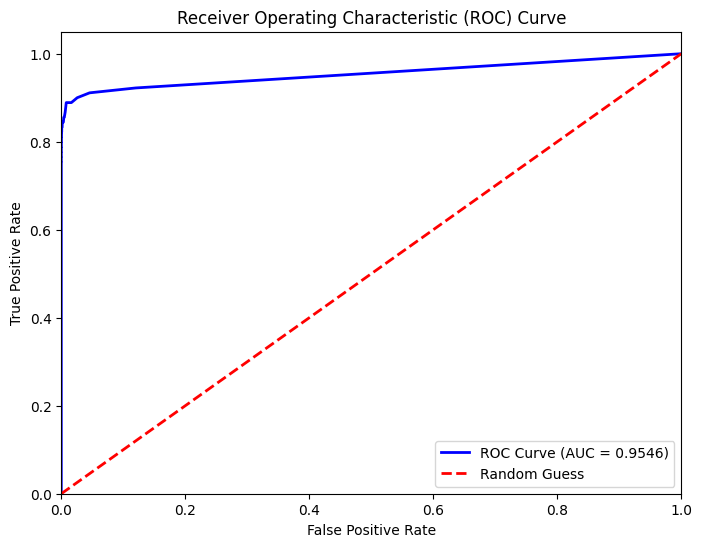

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.4f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()